# Reference: RL Model Code

## Initialization

In [1]:
# Run dependencies
%run ./RL_model_python_lib_utils.ipynb
%run ./RL_model_python_lib_reward.ipynb
%run ./RL_model_python_lib_decision_functions.ipynb
%run ./RL_model_python_lib_visualization.ipynb

## Model Fit

In [2]:
df = read_rps_data(os.path.join("data", DEFAULT_FILE))

In [3]:
# add opponent move column
separated = separate_df(df)
for e in separated:
    get_opponent_move(e)
df = pd.concat(separated)

### a) human_reward_move

In [4]:
df_a = add_col(df, ['rock_reward', 'paper_reward','scissors_reward',], value =0)
separated = separate_df(df_a)
for e in separated:
    human_reward_move(e)
df_a = pd.concat(separated)

In [5]:
soft_dist = get_softmax_probabilities(
    df_a, # df should be just human rows at this point, strip out nans etc. 
    ['rock_reward', 'paper_reward', 'scissors_reward']
)

/Users/jiemei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
df_a = pick_move(df_a, soft_dist)

In [7]:
df_a=df_a[df_a['is_bot']==0]
df_a=assign_agent_outcomes(df_a)

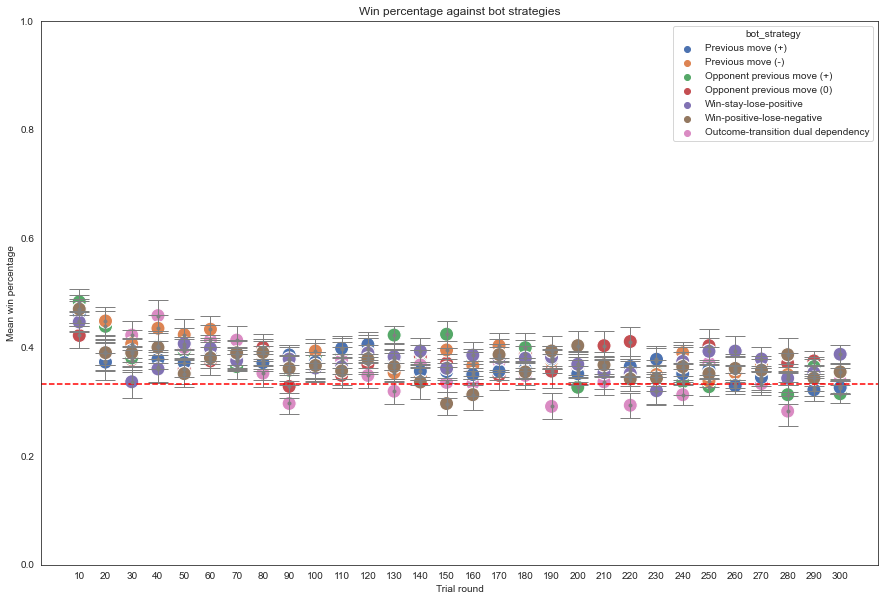

In [8]:
plot_win_rates(win_summary(groupby_f_data(df_a,'agent_outcome',30),'agent_outcome'))

### 3b human_past_current_reward_move

In [10]:
separated = separate_df(df)
for e in separated:
    human_reward_past_cur_move(e)
df_b = pd.concat(separated)

In [21]:
separated = separate_df(df_b)
df_result_b = pd.DataFrame()
for e in separated:
    e = get_softmax_probabilities_3b(e)
    e=pick_move_3b(e)
    e['agent_outcome'] = e.apply(lambda x: evaluate_outcome(x['agent_move'], x['opponent_move']), axis=1)
    df_result_b=pd.concat([df_result_b,e],axis=0)

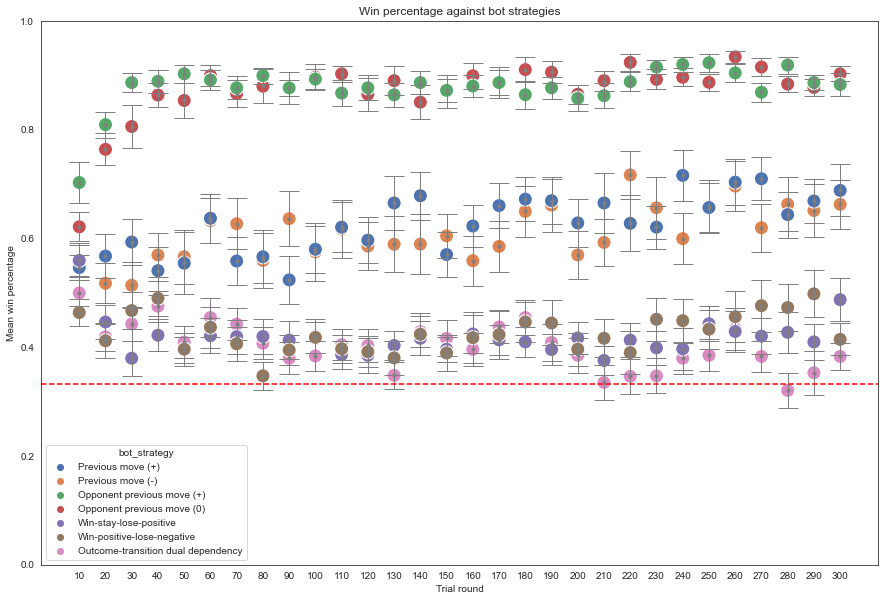

In [22]:
plot_win_rates(win_summary(groupby_f_data(df_result_b,'agent_outcome',30),'agent_outcome'))

### 3c opponent_past_human_current_reward_move

In [27]:
# separate df into same game id
separated = separate_df(df)
for e in separated:
    human_reward_oppo_past_cur_move(e)
df_c = pd.concat(separated)

In [25]:
separated = separate_df(df_c)
df_result_c = pd.DataFrame()
# align results from the generaed agent move and opponent move
for e in separated:
    e = get_softmax_probabilities_3c(e)
    e=pick_move_3c(e)
    e['agent_outcome'] = e.apply(lambda x: evaluate_outcome(x['agent_move'], x['opponent_move']), axis=1)
    df_result_c=pd.concat([df_result_c,e],axis=0)

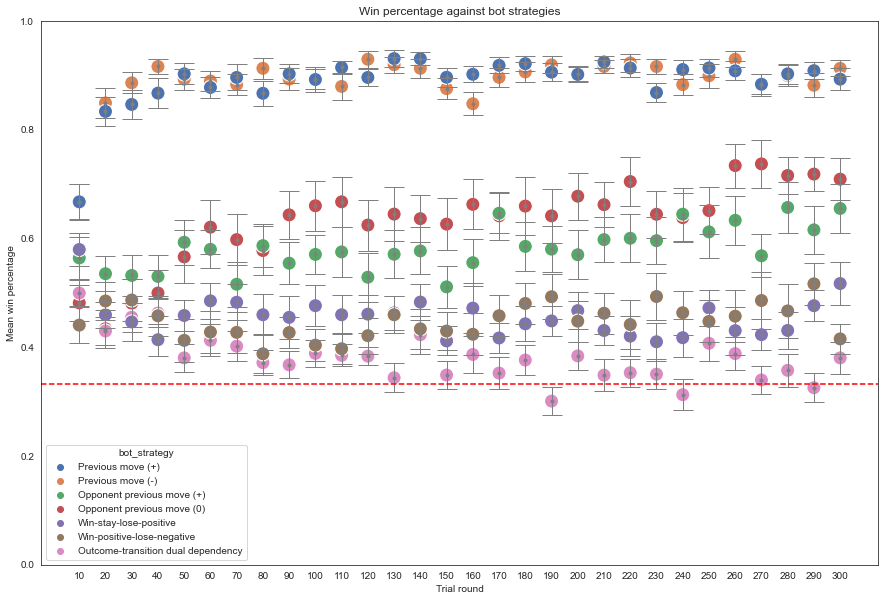

In [26]:
plot_win_rates(win_summary(groupby_f_data(df_result_c,'agent_outcome',30),'agent_outcome'))

### 3d) opponent_past_human_past_current_move (mix)

In [29]:
separated_agent_past = separate_df(df_b)
separated_oppo_past=separate_df(df_c)
df_result_mix = pd.DataFrame()
count=0
for i in range(len(separated_oppo_past)):
# for e_agent,e_oppo in separated_agent_past, separated_oppo_past:
    e=get_softmax_probabilities_mix(separated_agent_past[i], separated_oppo_past[i])
    e=pick_move_3d(e)
    e['agent_outcome'] = e.apply(lambda x: evaluate_outcome(x['agent_move'], x['opponent_move']), axis=1)
    df_result_mix=pd.concat([df_result_mix,e],axis=0)

,index,game_id,version,is_sona_autocredit,sona_experiment_id,sona_credit_token,sona_survey_code,round_index,player_id,is_bot,...,paper_paper_reward,paper_scissors_reward,scissors_rock_reward,scissors_paper_reward,scissors_scissors_reward,softmax_prob_rock,softmax_prob_paper,softmax_prob_scissors,agent_move,agent_outcome
0,0,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,1,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,...,NaN,NaN,NaN,NaN,NaN,3.333333e-01,3.333333e-01,3.333333e-01,scissors,lose
1,2,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,2,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,...,0.0,0.0,0.0,0.0,0.0,4.223188e-01,1.553624e-01,4.223188e-01,rock,win
2,4,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,3,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,...,0.0,0.0,0.0,0.0,0.0,3.333333e-01,3.333333e-01,3.333333e-01,paper,lose
3,6,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,4,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,...,0.0,0.0,3.0,0.0,0.0,9.094430e-01,4.527850e-02,4.527850e-02,rock,win
4,8,30aea025-4c7b-41c0-bd03-363cc73bf583,2,1,1768,19421bc286424246b6b1e873e7a55a8e,32028,5,c82739a2-9e24-4c1b-840f-9eb00d10cd9b,0,...,0.0,0.0,3.0,0.0,0.0,9.094430e-01,4.527850e-02,4.527850e-02,rock,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,590,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,296,9abb892e-7543-47bf-a2dc-40b0796b01b7,0,...,-11.0,2.0,-2.0,153.0,-4.0,1.000000e+00,1.080639e-30,4.780893e-25,rock,win
296,592,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,297,9abb892e-7543-47bf-a2dc-40b0796b01b7,0,...,-11.0,2.0,-2.0,153.0,-4.0,4.906095e-35,7.095474e-23,1.000000e+00,scissors,win
297,594,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,298,9abb892e-7543-47bf-a2dc-40b0796b01b7,0,...,-11.0,2.0,-2.0,156.0,-4.0,2.406977e-69,1.000000e+00,3.257489e-70,paper,win
298,596,89fe5868-3da2-45b8-9687-8aec90b283f2,2,1,1768,19421bc286424246b6b1e873e7a55a8e,27853,299,9abb892e-7543-47bf-a2dc-40b0796b01b7,0,...,-11.0,2.0,-2.0,156.0,-4.0,1.000000e+00,2.937482e-30,1.299581e-24,rock,lose


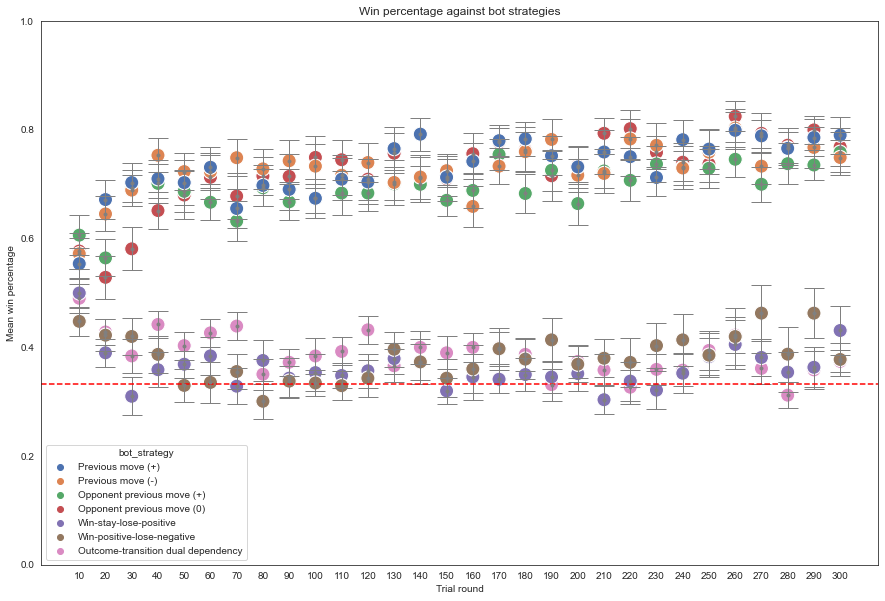

In [30]:
plot_win_rates(win_summary(groupby_f_data(df_result_mix,'agent_outcome',30),'agent_outcome'))